## Insights from the data

### By: Justin Tran
### 9/28/2025

#### Thought Process
1. I want to figure out which companies perform the worst
2. After figuring out which companies perform the worst, I want to know why they do (ask Marshall)
3. I will try to combine the datasets with the company names so I can see all the data better
4. Why is the company Delta Plastics doing so well with their data compared to others?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Make csv into a pandas dataframe
inventory_forecast = pd.read_csv('inventory_forecasts.csv')
orders = pd.read_csv('orders.csv')
data_dictionary = pd.read_csv('data_dictionary.csv')
company_profiles = pd.read_csv('company_profiles.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Note: Found this data to not be so helpful

# Basic insights in orders.csv
print(orders['company_name'].unique())
print(company_profiles['company_name'].unique())
# Maybe these companies could be merged into one to read easier

# These are all the companies in the whole dataset
display((orders.merge(company_profiles, on='company_name', how='outer'))['company_name'].unique())


['AutoSeal Gaskets' 'Great Lakes Fasteners' 'PolyTech Midwest'
 'Delta Plastics' 'Midland Moldings' 'Precision Plastics West'
 'TriCounty Components' 'Riverbend Metals']
['Delta Plastics' 'Midland Moldings' 'Great Lakes Fasteners'
 'TriCounty Components' 'Riverbend Metals' 'Lakeside Warehousing'
 'Mid-MI Crossdock' 'Downtown Storage Co.' 'QuickRoute Carriers'
 'Superior Haulage' 'Mitten Last-Mile' 'AutoSeal Gaskets'
 'PolyTech Midwest' 'Precision Plastics West' 'North Fork Logistics']


array(['AutoSeal Gaskets', 'Delta Plastics', 'Downtown Storage Co.',
       'Great Lakes Fasteners', 'Lakeside Warehousing',
       'Mid-MI Crossdock', 'Midland Moldings', 'Mitten Last-Mile',
       'North Fork Logistics', 'PolyTech Midwest',
       'Precision Plastics West', 'QuickRoute Carriers',
       'Riverbend Metals', 'Superior Haulage', 'TriCounty Components'],
      dtype=object)

In [4]:
# Trying to find insights for actual quantity from region or sku

region_sku_actualqty = orders[['region', 'sku', 'actual_qty']]
# Attempting to aggregate region with actual_qty
region_actualqty = region_sku_actualqty.groupby('region').sum()
print(region_actualqty)

                                                           sku  actual_qty
region                                                                    
Central MI   SKU0042SKU0013SKU0047SKU0008SKU0065SKU0012SKU0...       54988
Northern MI  SKU0051SKU0007SKU0028SKU0054SKU0009SKU0031SKU0...       23508
SE MI        SKU0020SKU0010SKU0005SKU0008SKU0029SKU0007SKU0...       37113
West MI      SKU0016SKU0008SKU0038SKU0019SKU0055SKU0047SKU0...       19346


### Heatmap for the correlation in orders.csv

<Axes: >

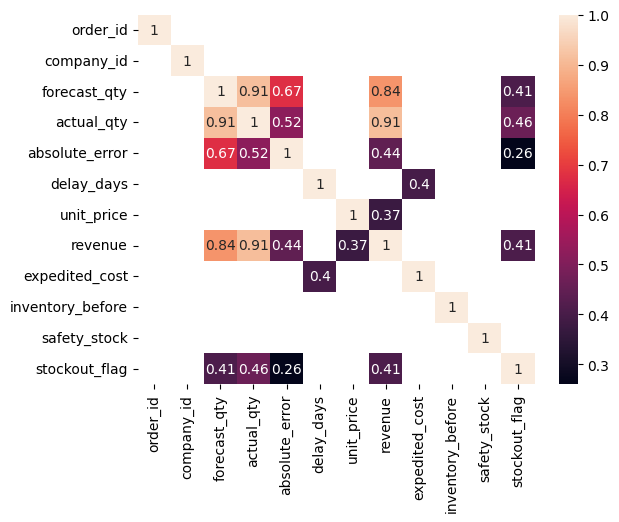

In [5]:
# Plotting which columns have the most correlation on a heatmap
orders_correlation = orders.corr(numeric_only=True)

# Only correlations higher than 0.2
sns.heatmap(orders_correlation[orders_correlation > 0.2], annot=True)

### Scatterplot between forecast and actual quantity

<Axes: xlabel='actual_qty', ylabel='forecast_qty'>

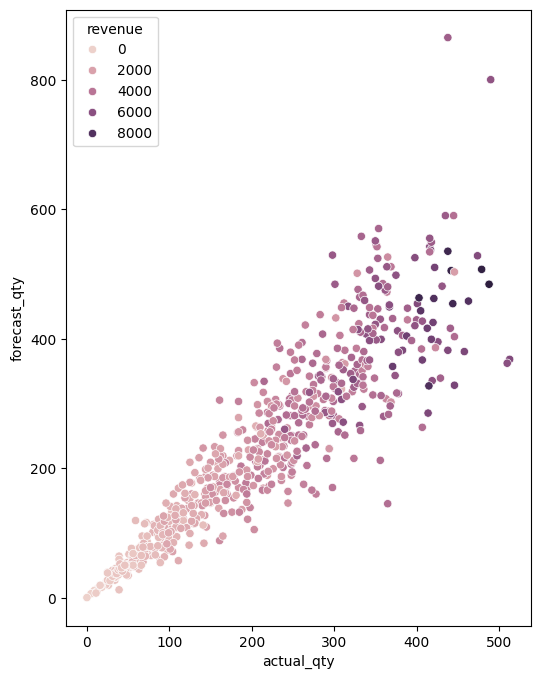

In [6]:
plt.figure(figsize=(6, 8))
sns.scatterplot(data=orders,
                y='forecast_qty',
                x='actual_qty',
                hue='revenue')

### Subplotting Companies and their Actual v Forecast Qty

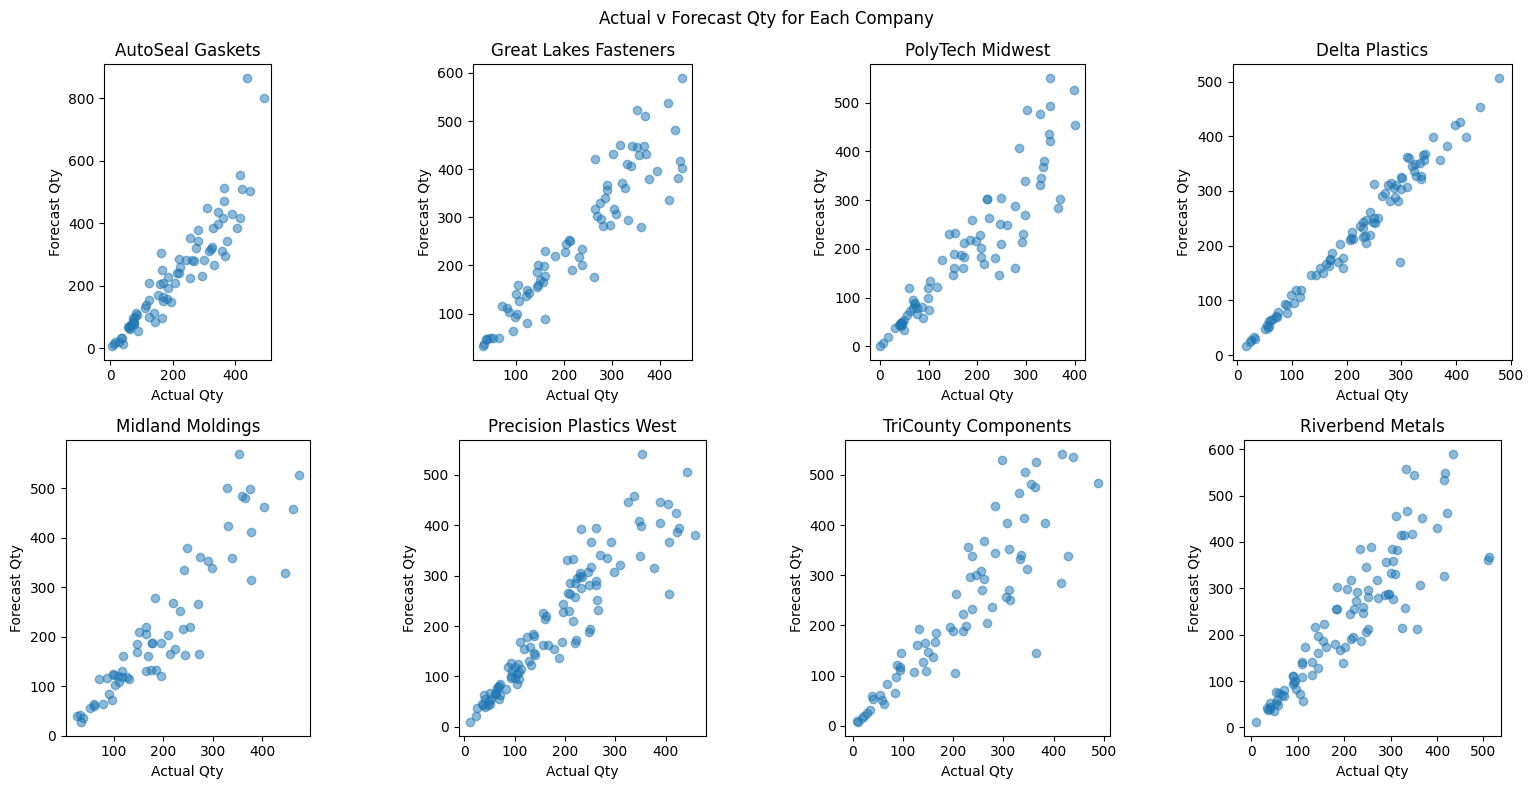

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle('Actual v Forecast Qty for Each Company')

axs[0, 0].scatter((orders[orders['company_name'] == 'AutoSeal Gaskets']['actual_qty']), (orders[orders['company_name'] == 'AutoSeal Gaskets']['forecast_qty']), alpha=0.5)
axs[0, 0].set_title('AutoSeal Gaskets')
axs[0, 0].set_xlabel('Actual Qty')
axs[0, 0].set_ylabel('Forecast Qty')

axs[0, 1].scatter((orders[orders['company_name'] == 'Great Lakes Fasteners']['actual_qty']), (orders[orders['company_name'] == 'Great Lakes Fasteners']['forecast_qty']), alpha=0.5)
axs[0, 1].set_title('Great Lakes Fasteners')
axs[0, 1].set_xlabel('Actual Qty')
axs[0, 1].set_ylabel('Forecast Qty')

axs[0, 2].scatter((orders[orders['company_name'] == 'PolyTech Midwest']['actual_qty']), (orders[orders['company_name'] == 'PolyTech Midwest']['forecast_qty']), alpha=0.5)
axs[0, 2].set_title('PolyTech Midwest')
axs[0, 2].set_xlabel('Actual Qty')
axs[0, 2].set_ylabel('Forecast Qty')

axs[0, 3].scatter((orders[orders['company_name'] == 'Delta Plastics']['actual_qty']), (orders[orders['company_name'] == 'Delta Plastics']['forecast_qty']), alpha=0.5)
axs[0, 3].set_title('Delta Plastics')
axs[0, 3].set_xlabel('Actual Qty')
axs[0, 3].set_ylabel('Forecast Qty')

axs[1, 0].scatter((orders[orders['company_name'] == 'Midland Moldings']['actual_qty']), (orders[orders['company_name'] == 'Midland Moldings']['forecast_qty']), alpha=0.5)
axs[1, 0].set_title('Midland Moldings')
axs[1, 0].set_xlabel('Actual Qty')
axs[1, 0].set_ylabel('Forecast Qty')

axs[1, 1].scatter((orders[orders['company_name'] == 'Precision Plastics West']['actual_qty']), (orders[orders['company_name'] == 'Precision Plastics West']['forecast_qty']), alpha=0.5)
axs[1, 1].set_title('Precision Plastics West')
axs[1, 1].set_xlabel('Actual Qty')
axs[1, 1].set_ylabel('Forecast Qty')

axs[1, 2].scatter((orders[orders['company_name'] == 'TriCounty Components']['actual_qty']), (orders[orders['company_name'] == 'TriCounty Components']['forecast_qty']), alpha=0.5)
axs[1, 2].set_title('TriCounty Components')
axs[1, 2].set_xlabel('Actual Qty')
axs[1, 2].set_ylabel('Forecast Qty')

axs[1, 3].scatter((orders[orders['company_name'] == 'Riverbend Metals']['actual_qty']), (orders[orders['company_name'] == 'Riverbend Metals']['forecast_qty']), alpha=0.5)
axs[1, 3].set_title('Riverbend Metals')
axs[1, 3].set_xlabel('Actual Qty')
axs[1, 3].set_ylabel('Forecast Qty')

for ax_row in axs:
    for ax in ax_row:
        ax.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()
    

### Finding useful small pieces  of company data that could be correlated to the percent error

In [8]:
# Figure out which companies have the most on-time deliveries
if orders['on_time_delivery'].dtype == 'object':
    orders['on_time_delivery'] = orders['on_time_delivery'].str.strip().str.lower()
    orders['on_time_delivery'] = orders['on_time_delivery'].map({'yes': 1, 'no': 0})

on_time_rate = orders.groupby('company_name')['on_time_delivery'].mean().sort_values() * 100
on_time_rate = on_time_rate.reset_index()
pd.DataFrame(on_time_rate)
# This will show the percentage of on-time deliveries for each company

,company_name,on_time_delivery
0,TriCounty Components,61.428571
1,Precision Plastics West,66.981132
2,Midland Moldings,68.750000
3,Great Lakes Fasteners,71.052632
4,AutoSeal Gaskets,72.727273
5,Riverbend Metals,75.268817
6,PolyTech Midwest,86.842105
7,Delta Plastics,89.772727


In [9]:
orders["error"] = orders["actual_qty"] - orders["forecast_qty"]
orders["pct_error"] = abs(orders["error"] / orders["actual_qty"]) * 100

# This shows which companies have the least accurate forecasting
summary = orders.groupby("company_name")["pct_error"].mean().sort_values()
pd.DataFrame(summary)

,pct_error
company_name,
Delta Plastics,6.569244
Great Lakes Fasteners,20.232155
Precision Plastics West,20.684808
PolyTech Midwest,20.927169
Midland Moldings,21.820317
AutoSeal Gaskets,22.165811
Riverbend Metals,22.604659
TriCounty Components,22.678912


In [10]:
fresh_days = inventory_forecast.groupby('company_name')['data_freshness_days'].mean()
fresh_days = fresh_days.reset_index()

smape = inventory_forecast[['company_name', 'smape_pct']]
smape['smape_pct'] = smape['smape_pct'].astype('str')
smape['smape_pct'] = smape['smape_pct'].str.replace('%','')
smape['smape_pct'] = smape['smape_pct'].astype('float')
smape = smape.groupby('company_name')['smape_pct'].mean()
smape = smape.reset_index()
display(fresh_days)
display(smape)

C:\Users\justi\AppData\Local\Temp\ipykernel_12456\1187359374.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smape['smape_pct'] = smape['smape_pct'].astype('str')
C:\Users\justi\AppData\Local\Temp\ipykernel_12456\1187359374.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smape['smape_pct'] = smape['smape_pct'].str.replace('%','')
C:\Users\justi\AppData\Local\Temp\ipykernel_12456\1187359374.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,company_name,data_freshness_days
0,AutoSeal Gaskets,4.408163
1,Delta Plastics,3.786517
2,Great Lakes Fasteners,4.684211
3,Midland Moldings,4.162162
4,PolyTech Midwest,4.337838
5,Precision Plastics West,4.482759
6,Riverbend Metals,3.800000
7,TriCounty Components,4.019608


,company_name,smape_pct
0,AutoSeal Gaskets,16.921837
1,Delta Plastics,17.719213
2,Great Lakes Fasteners,16.280263
3,Midland Moldings,18.585946
4,PolyTech Midwest,21.566216
5,Precision Plastics West,16.937356
6,Riverbend Metals,17.507067
7,TriCounty Components,16.201765


In [11]:
upload_frequency = company_profiles[['company_name', 'upload_frequency']]
upload_frequency['upload_frequency'] = upload_frequency['upload_frequency'].astype('string')

upload_frequency

C:\Users\justi\AppData\Local\Temp\ipykernel_12456\294506162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upload_frequency['upload_frequency'] = upload_frequency['upload_frequency'].astype('string')


,company_name,upload_frequency
0,Delta Plastics,Weekly
1,Midland Moldings,Weekly
2,Great Lakes Fasteners,Weekly
3,TriCounty Components,Weekly
4,Riverbend Metals,Biweekly
5,Lakeside Warehousing,Weekly
6,Mid-MI Crossdock,Weekly
7,Downtown Storage Co.,Monthly
8,QuickRoute Carriers,Weekly
9,Superior Haulage,Ad-hoc


### Combining all the company data into one big dataset

,company_name,pct_error,adoption_stage,on_time_delivery,data_freshness_days,smape_pct,upload_frequency
0,Delta Plastics,6.569244,High,89.772727,3.786517,17.719213,Weekly
1,Great Lakes Fasteners,20.232155,Medium,71.052632,4.684211,16.280263,Weekly
2,Precision Plastics West,20.684808,Low,66.981132,4.482759,16.937356,Weekly
3,PolyTech Midwest,20.927169,Low,86.842105,4.337838,21.566216,Weekly
4,Midland Moldings,21.820317,Low,68.750000,4.162162,18.585946,Weekly
5,AutoSeal Gaskets,22.165811,Medium,72.727273,4.408163,16.921837,Weekly
6,Riverbend Metals,22.604659,Medium,75.268817,3.800000,17.507067,Biweekly
7,TriCounty Components,22.678912,Low,61.428571,4.019608,16.201765,Weekly


<Axes: >

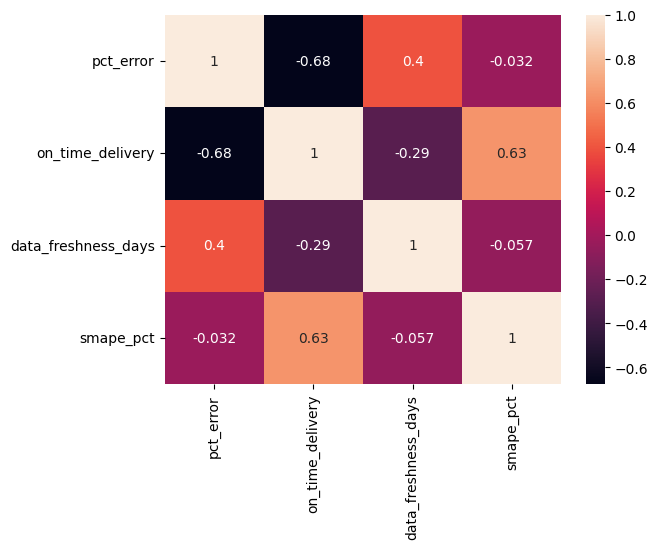

In [12]:
# The company with low/medium adoption stage has a higher percent error
company_stats = (pd.merge((pd.DataFrame(summary)), (company_profiles[['company_name','adoption_stage']]), on='company_name'))
company_stats['company_name'] = company_stats['company_name'].astype('string')
company_stats['adoption_stage'] = company_stats['adoption_stage'].astype('string')
company_stats = company_stats.merge(on_time_rate, on='company_name')
company_stats = company_stats.merge(fresh_days, on='company_name')
company_stats = company_stats.merge(smape, on='company_name')
company_stats = company_stats.merge(upload_frequency, on='company_name')
display(company_stats)

sns.heatmap(company_stats.corr(numeric_only=True), annot=True)

### Finding correlation between data quality and number of analysts

<Axes: >

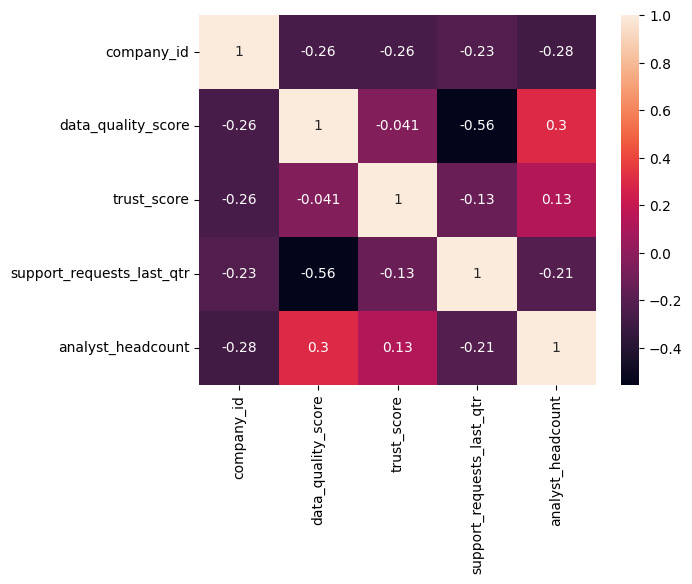

In [13]:
company_profiles['data_quality_score'] = company_profiles['data_quality_score'].astype('str')
company_profiles['data_quality_score'] = company_profiles['data_quality_score'].str.replace('%', '')
company_profiles['data_quality_score'] = company_profiles['data_quality_score'].astype('float')

company_profiles['trust_score'] = company_profiles['trust_score'].astype('str')
company_profiles['trust_score'] = company_profiles['trust_score'].str.replace('%', '')
company_profiles['trust_score'] = company_profiles['trust_score'].astype('float')

sns.heatmap(company_profiles.corr(numeric_only=True), annot=True)

<Axes: xlabel='analyst_headcount', ylabel='data_quality_score'>

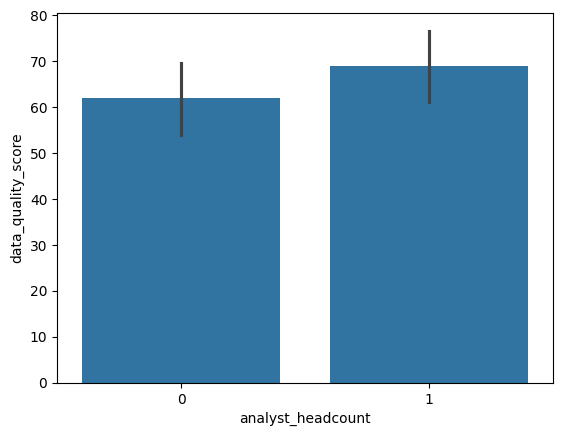

In [14]:
sns.barplot(data=company_profiles, x='analyst_headcount',y='data_quality_score')